# Семинар 8: KNN и SVM


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Murcha1990/ML_math_2022/blob/main/Семинары/sem08-knn_svm.ipynb)

#### План:

1. $k$ nearest neighbors (KNN)
2. SVM (объяснение) + задачи.
3. Ирисы Фишера. Свойства KNN и SVM
4. Логистическая регрессия и SVM на менее приятных данных.
5. ROC-кривая + задача. 

In [ ]:
%pip install mlxtend==0.21.0 matplotlib==3.7.1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123)


### Метод $k$ ближайших соседей (KNN)

**Главная мысль:** Похожие объекты принадлежат к одному классу.

![KNN illustrated](https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg)

$$
f(x, X_i) = argmax_c\left(\sum_{i = 1}^k [y_{(i)} = c]\right),
$$
где $d(x, X_{(1)}) \leqslant d(x, X_{(2)}) \leqslant \dots \leqslant d(x, X_{(n)})$

**Гиперпараметры:**
* Число соседей
* Метрика
* Стратегия усреднения (optional)

**Замечания:**
- Чувствителен к преобразованиям признаков
- Хранит почти всю выборку

### Метод опорных векторов (SVM)

Метод опорных векторов – математически строго обоснованный метод, идея которого состоит в максимизации ширины разделяющей полосы между классами.

Мы по-прежнему решаем задачу бинарной классификации и используем классификатор $f(x_i, w) = \mathrm{sign}(\langle x_i, w\rangle)$. Предположим, что мы работаем с линейно разделимой выборкой. Мы хотим максимизировать отступ (расстояние от точки до разделяющей поверхности) классификатора:

$$
\rho(x_i, \langle x, w\rangle) =  \min_i\dfrac{|{\langle x_i, w\rangle|}}{\|w\|}.
$$

Воспользуемся картинкой из Википедии, чтобы лучше понять эту идею:

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/1920px-SVM_margin.png" alt="drawing" width="400"/>](https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png)

В линейно-разделимом случае задача SVM выглядит так:
$$
\begin{cases}
\|w\|^2 \to \min_{w}, \\
y_i(\langle x_i, w\rangle) \ge 1, \\
\end{cases}
$$

Если выборка не является линейно-разделимой, то нам придётся позволить линейному классификатору допускать ошибки на некоторых наблюдениях. Тогда задача превращается в поиск оптимального выбора между максимизацией ширины разделяющей полосы и ошибок классификации:

$$
\begin{cases}
\|w\|^2 + C \sum_{i = 1}^{\ell} \xi_i \to \min_{w, \xi_i}, \\
y_i(\langle x_i, w\rangle) \ge 1 - \xi_i, \\
\xi_i \ge 0
\end{cases}
$$

$C$ – параметр, который позволяет регулировать пропорции этого выбора. Чем больше $C$, тем больше штраф за неверную классификацию.

![Задание 1](https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/images/pic2.png) 

Путём хитрых математических преобразований можно показать, что итоговая функция потерь SVM выглядит следующим образом:

$$
Q(X, w) = \sum_{i=1}^{l} \max\{0, 1 - y_i(\langle x_i, w\rangle)\} + \frac1C\|w\|^2 \to \min_w
$$

**Задание 1.**
![Задание 1](https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/images/SVM_task.png) 

**Задание 2.**
По картинке качественно решите задачу классификации методом опорных векторов.

* как пройдет разделяющая полоса при маленьком С?
* как пройдет разделяющая полоса при большом С?

![Задание 1](https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/images/SVM_task2.png) 

### Ирисы Фишера. Свойства логистической регрессии и SVM

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`. Задача состоит в том, чтобы по измерениям предсказать класс цветка. 

![](https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/images/pic3.png) 

In [5]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Отделите их в отдельную матрицу. Разделим выборку на обучающую и тестовую, долю тестовой выборки укажите равной 0.3. Отмасштабируем выборки при помощи StandardScaler. Построим диаграмму рассеяния по тренировочной выборке и убедимся, что данные линейно не разделимы. 

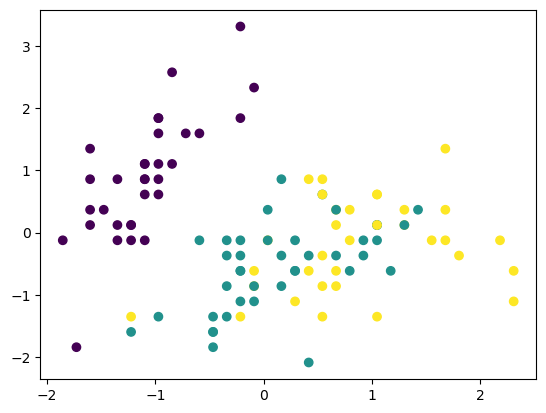

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

X = X[['sepal length (cm)', 'sepal width (cm)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)

Начнём с простого. Обучим KNN и SVM с линейным ядром на тренировочной выборке и убедимся, что полученные оценки весов действительно различаются. Убедимся, что `accuracy`, возможно, не подходит в качестве метрики для данной задачи и рассчитаем `f1-меру` на тестовой выборке. Какой алгорим показал более высокое качество?

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

svm = SVC(kernel='linear', ) 
svm.fit(X_train, y_train)

print(svm.coef_)

[[-2.09697854  1.07757787]
 [-1.76113228  0.72399674]
 [-1.10792458 -0.17154772]]


Теперь посмотрим, как различаются решающие поверхности алгоритмов. 

Код ниже построит решающие поверхности для классификаторов.

In [ ]:
%pip install mlxtend

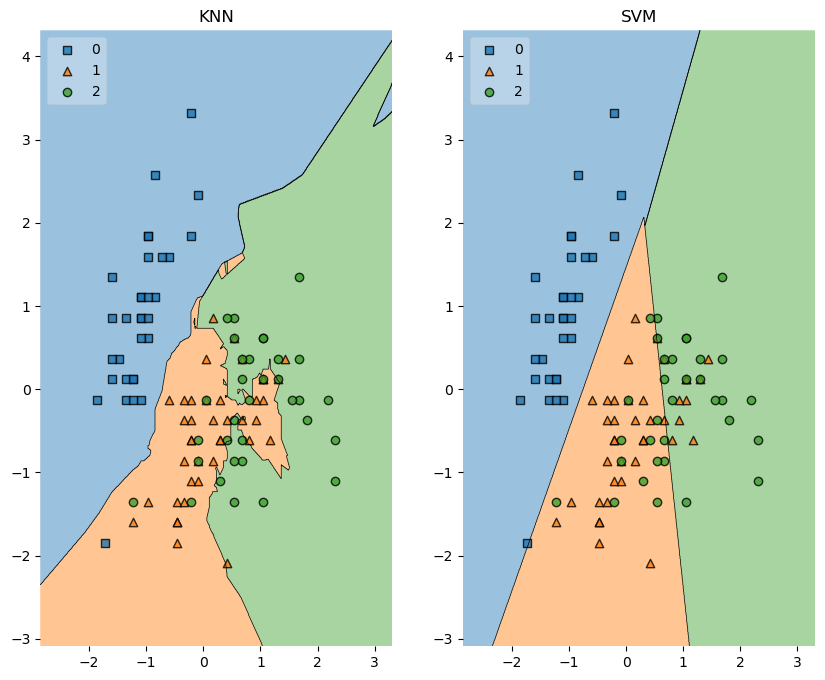

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,8))

labels = ['KNN', 'SVM']
for clf, lab, grd in zip([knn, svm],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

In [10]:
from sklearn.metrics import f1_score
print('KNN: ', f1_score(y_test, knn.predict(X_test), average="micro"))
print('SVM: ', f1_score(y_test, svm.predict(X_test), average="micro"))

KNN:  0.7555555555555555
SVM:  0.8444444444444444


Теперь изучим свойства каждого классификатора по-отдельности. Начнём с логистической регрессии.

Обучим три различные логистические регрессии с разным параметром регуляризации $\alpha$ (обратите внимание, что в реализации `sklearn` $C = 1/\alpha$). Как изменяется разделяющая поверхность в зависимости от $\alpha$?

In [12]:
K = [1, 5, 50] # smaller = stronger reg

knn1 = KNeighborsClassifier(n_neighbors=K[0])
knn2 = KNeighborsClassifier(n_neighbors=K[1])
knn3 = KNeighborsClassifier(n_neighbors=K[2])

knn2

KNeighborsClassifier()

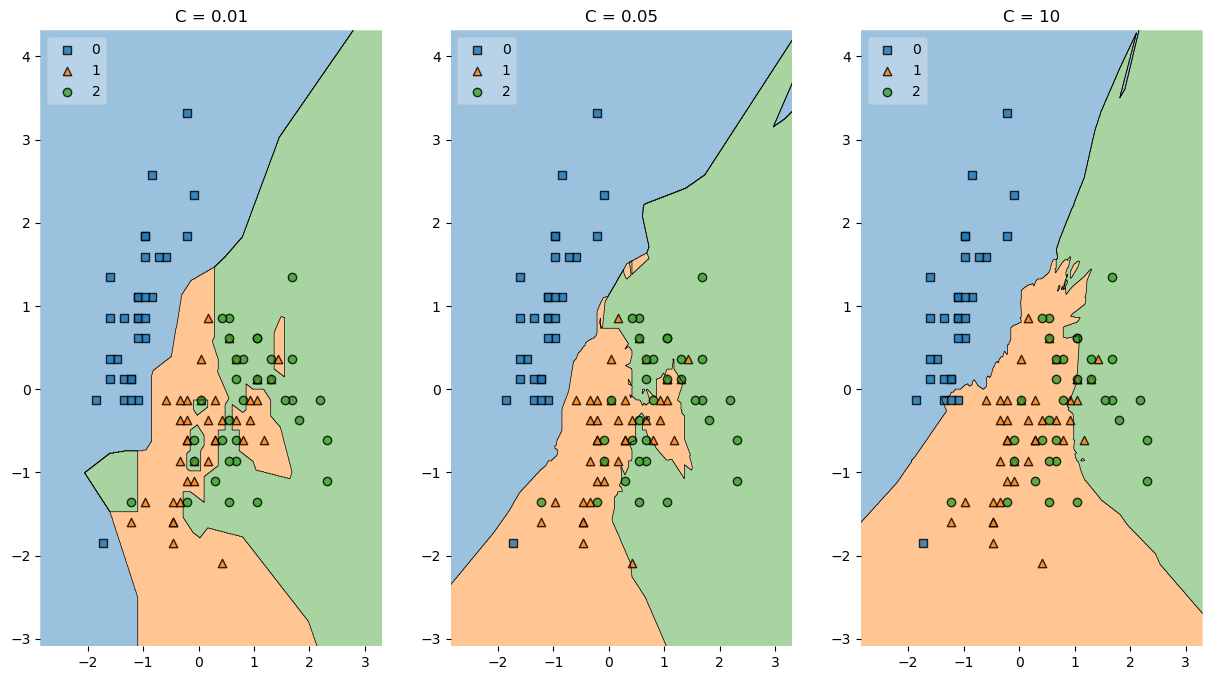

In [13]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15,8))

labels = ['K = 1', 'K = 5', 'K = 50']
for clf, lab, grd in zip([knn1, knn2, knn3],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

Перейдём к SVM.

Обучим три SVM с линейным ядром с разным параметром регуляризации $C$. Как изменяется разделяющая поверхность в зависимости от $C$?

In [ ]:
C = [0.04, 0.05, 1] # smaller = stronger reg

svc1 = SVC(C = C[0], kernel = 'linear', decision_function_shape="ovr")
svc2 = SVC(C = C[1], kernel = 'linear', decision_function_shape="ovr")
svc3 = SVC(C = C[2], kernel = 'linear', decision_function_shape="ovr")

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15,8))

labels = ['C = 0.04', 'C = 0.05', 'C = 1']
for clf, lab, grd in zip([svc1, svc2, svc3],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)


plt.show()

### KNN и SVM на менее приятных данных.

Мы будем работать с [набором данных](https://www.kaggle.com/piyushgoyal443/red-wine-dataset?select=wineQualityReds.csv), содержащим информацию о характеристиках вина. Каждое наблюдение принадлежит к одному из 10 категорий качества вина, и наша задача заключается в том, что предсказать эту категорию. 

In [ ]:
!wget https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/data/wineQualityReds.csv

In [15]:
data = pd.read_csv('wineQualityReds.csv', index_col = 0)
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Как указано в описании набора, в нём нет пропущенных значений, и все переменные являются непрерывными. Целевая переменная – `quality`. 

Перейдём к задаче бинарной классификации и будем предсказывать только наиболее популярную категорию качества. Закодируйте столбец `quality` так, чтобы наиболее частая категория (это категория 5) получила метку 1, а все прочие категории – метку -1.

In [16]:
qual = data.quality.copy()
qual[qual != 5] = 0
qual[qual == 5] = 1
data['quality'] = qual
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


Разделим признаки и целевую переменную. Разделим выборку на тренировочную и тестовую, долю тестовой выборки укажем равной 0.3. При помощи `StandardScaler` отмасштабируем тренировочную и тестовую выборки. 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis = 1), data['quality'])

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

При помощи кросс-валидации подберем оптимальные значения коэффициентов регуляризации для SVM с линейным ядром и значение $k$ для KNN. Обучим модели с этими параметрами. Убедимся, что доля правильных ответов – не лучший вариант для нашей задачи и рассчитаем F-меру на тестовой выборке. Какой алгоритм показал себя лучше? 

 **Бонус:** качество работы SVM можно улучшить за счёт применения ядер, после чего разделяющая поверхность становится нелинейной. 

In [18]:
from sklearn.model_selection import cross_validate

scores_knn = []
scores_svm = []

for k in range(1, 15, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_knn = cross_validate(knn, X_train, y_train, cv = 5, scoring=('f1'))['test_score']
    scores_knn.append(cv_knn.mean())

for c in np.arange(0.1, 10, 1):
    svm = SVC(C = c)
    cv_svm = cross_validate(svm, X_train, y_train, cv = 5, scoring=('f1'))['test_score']
    scores_svm.append(cv_svm.mean())

In [19]:
print(scores_knn, '\n')
print(scores_svm)

[0.7033560330902644, 0.5880800817377999, 0.6649112352400047, 0.6455720370469619, 0.6694929242297665] 

[0.696724276298043, 0.7113670851603654, 0.7049160121638255, 0.7099207978223763, 0.7053164491499074, 0.7052959085964694, 0.7022116307561349, 0.7081257707981041, 0.7095594824034871, 0.7080457210032198]


In [20]:
max(scores_knn), max(scores_svm)

(0.7033560330902644, 0.7113670851603654)

### ROC-кривая

Очень советуем почитать: https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/

Пример для понимания (из статьи выше):
![Данные 1](https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/images/table1.png) 
![ROC-кривая](https://raw.githubusercontent.com/Murcha1990/ML_math_2022/main/Семинары/images/pic1.png) 

Ранее мы узнали, что помимо accuracy в задачах классификации так же используются precision, recall и f-мера. Теперь пришло время познакомиться с ещё одной метрикой – ROC AUC.

Для начала вспомним, что мы работаем с матрицей ошибок:

|       | alg = 1          | alg = -1    |
|-------| -----------------|-------------|
|y = 1  |TP                |FN           |
|y = -1 |FP                | TN          |

Определим следующие величины:

$$
TPR \text{ (true positive rate, recall, sensitivity)} = \dfrac{TP}{TP + FN} –
$$
доля правильно предсказанных объектов положительного класса.

$$
FPR \text{ (false positive rate, 1 - specificity)} = \dfrac{FP}{FP + TN} –
$$
доля неправильно предсказанных объектов отрицательного класса.

Рассмотрим задачу мягкой классификации: мы предказываем вероятности принадлежности наблюдения к положительному и отрицательному классам. Тогда TPR и FPR будут зависеть от порога для вероятности, выше которого наблюдение будет отнесено к положительному классу. ROC-кривая строится в координатах $(FPR, TPR)$ и показывает комбинации TPR и FPR при всевозможных значениях порога. 

Для хорошего классификатора эта кривая является вогнутой, а для идеального классификатора она будет проходить через точку $(0, 1)$ (почему?).

[<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png" alt="drawing" width="350"/>](https://ru.wikipedia.org/wiki/ROC-кривая)



**Задание 3.** Постройте ROC-кривую для следующей выборки (на листочке).

In [ ]:
# True labels
y = [-1, 1, 1, -1, 1, 1]
# Predicted labels
p = [0.5, 0.1, 0.2, 0.9, 0.7, 0.1]

**Решение:**
1. Упорядочим наблюдения по убыванию ответов алгоритма.

In [ ]:
y = [-1, 1, -1, 1, 1, 1]
p = [0.9, 0.7, 0.5, 0.2, 0.1, 0.1]

2. Разобьём единичный квадрат на $(m, n)$ частей, где $m$ – число 1 в $y$, $n$ – число нулей. Стартуем из точки $(0, 0)$. Если значение $y$ равно 1, делаем шаг вверх, а если -1 – вправо. Понятно, что конечная точка нашего маршрута – точка $(1, 1)$.

**Важный момент:** если у нескольких объектов значения предсказаний равны, а $y$ – различны, то мы должны сделать ход "по диагонали". 

3. Полученная кривая и является ROC-кривой. 

4. Вычислим ROC AUC для построенной ROC-кривой. 

В `sklearn` реализовано вычисление значений ROC-кривой и площади под ней. 

In [ ]:
from sklearn.metrics import roc_curve, auc

Построим ROC-кривую и рассчитаем площадь под ней для логистической регрессии.

In [ ]:
lr = KNeighborsClassifier()
lr.fit(X_train, y_train)

tpr, fpr, _ = roc_curve(y_train, lr.predict_proba(X_train)[:, 0])

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
auc(fpr, tpr)